# N-P model

### Nutrient-Phytoplankton model of Sarmiento and Gruber (2006)

    - dN/dt = -Vmax*N/(N+K)*P + m*l*P - g*(N-Nth)
    - dP/dt = Vmax*N/(N+K)*P - lambda*P

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [32]:
# coefficients
h = 1 # timestep size
t = np.arange(0,360,h) # time in day
N = np.size(t) # dimension of time step
nuto = .001 # initial condition in nutrient
phyo = .001 # initial condition in phyto
# set parameters
Vmax = 1.4 # per day
K = 0.1 # mmol/m3
m = 0.7 
l = 0.05 # per day
g = 0.001 # per day
Nth = 0.1 # mmol/m3

In [28]:
def tendency(t,x,Vmax,K,m,l,g,Nth):
    nut=x[0]
    phy=x[1]
    dnutdt = -Vmax*nut/(nut+K)*phy + m*l*phy -g*(nut-Nth)
    dphydt = Vmax*nut/(nut+K)*phy - l*phy
    out=np.array([dnutdt,dphydt])
    return out

In [29]:
# define model_run function
def model_run(trange,xinit,param,dt):
    # expand input
    Vmax = param[0]
    K = param[1]
    m = param[2]
    l = param[3]
    g = param[4]
    Nth = param[5]
    sol = solve_ivp(tendency,trange,xinit,args=(Vmax,K,m,l,g,Nth),method='RK45',max_step=dt)
    return sol

In [30]:
# set time range
trange = [0,360]
# set parameters
param=np.array([Vmax,K,m,l,g,Nth])
# set initial conditions
xinit = np.array([nuto,phyo])
# time step size
h = 1
out = model_run(trange,xinit,param,h)

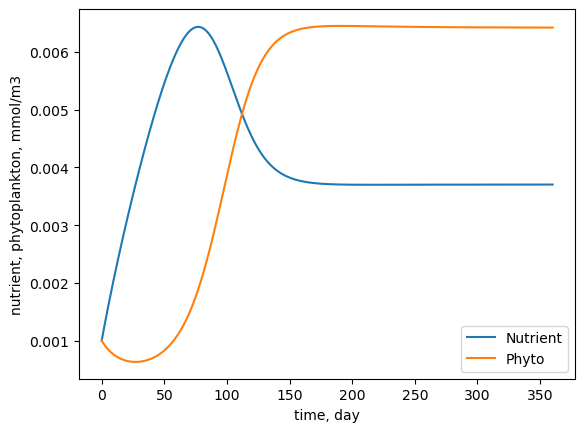

In [34]:
# plot the output
t_out = out.t
vec_out = out.y
x_out = vec_out[0,:]
y_out = vec_out[1,:]
#
plt.plot(t_out,x_out,label='Nutrient')
plt.plot(t_out,y_out,label='Phyto')
plt.legend()
plt.xlabel('time, day')
plt.ylabel('nutrient, phytoplankton, mmol/m3')
plt.show()